In [2]:
import graphviz
from graphviz import Digraph
import random as rnd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
%matplotlib inline

In [3]:
class DataRecord:
    
    """Simple data record consisting of key and data"""
    
    def __init__(self, k=1, d=""):
        self.key = k
        self.data = d
        
    def __str__(self):
        return "Key: " + str(self.key) + "     Data: " + str(self.data)

In [4]:
class Node:
    
    """Node of a Binary Search Tre"""
    
    def __init__(self, rec=DataRecord()):
        self.left = None
        self.right = None
        self.parent = None
        self.record = rec
        
    def height(self):
        if self.left is None:
            height_left = -1
        else:
            height_left = self.left.height()
        
        if self.right is None:
            height_right = -1
        else:
            height_right = self.right.height()
            
        return 1 + max(height_left,height_right)
        
    def draw(self,dot=None):
        dot = Digraph() if dot is None else dot
        dot.node(str(self),label=str(self.record.key))
        for subtree in [self.left,self.right]:
            if subtree is not None:
                subtree.draw(dot)
                dot.edge(str(self),str(subtree))
        return dot

In [6]:
class BinarySearchTree:
    
    """Binary Search Tree"""
    
    def __init__(self, A):
        self.n = 0
        self.root = None
        iterable_A = A if hasattr(A, '__iter__') else [A]
        for rec in iterable_A:
            self.insert(rec)
    
    def height(self):
        if self.root is not None:
            return self.root.height()
        else:
            return 0
    
    def draw(self):
        if self.root is not None:
            return self.root.draw()
        else:
            print("Tree is empty")
            return None
            
    def insert(self, rec):
        """
        Insert a new node of value rec to the Binary Search Tree
        """
        new_node = Node(rec)
        
        y = None
        x = self.root
        while x is not None:
            y = x
            x = x.left if new_node.record.key < x.record.key else x.right
        
        new_node.parent = y
        if y is None: # empty tree, we insert at the root
            self.root = new_node
        else:
            if new_node.record.key < y.record.key:
                y.left = new_node
            else:
                y.right = new_node    
        self.n += 1
    
    def search(self, rec):
        """
        Search for a node of value rec in the Binary Search Tree.
        Return None if not found
        """
        x = self.root
        while (x is not None) and (x.record.key != rec):
            parent = x
            x = x.left if rec < x.record.key else x.right
        if x is None:
            print("Key not found!")
            return None
        else:
            return x.record  
        
    def delete(self, val):
        """
        Delete a node of value val in the Binary Search Tree.
        Return None if not found
        """  
        x = self.root
        parent = None     
        # case 0: empty tree
        if x is None:
            print('This is an empty tree, you cannot delete anything')
            return False    
        # case 0.5: delete the root
        if x.record.key == val:        
            if x.right is not None:
                vater, sohn = x, x.right
                
                while sohn.left is not None:
                    vater, sohn = sohn, sohn.left
                x.record.key = sohn.record.key

                if sohn.right is not None:
                    vater.left = sohn.right 
                elif sohn.right is None:
                    vater.left = None                     
            elif x.right is None and x.left is not None:
                self.root = None       
            elif x.right is None and x.left is None:
                self.root = None 
                print('The result is an empty tree, nothing to print')             
            self.n += -1
            return True             
        while x is not None and x.record.key != val:
            parent = x
            x = x.left if val < x.record.key else x.right       
        # case 1: value not found in the tree -> delete no node
        if x is None:
            print("the value to be deleted does not exist in the binary tree")
            return False                      
        # case 2: the node to be deleted has 0 children 
        elif x.left is None and x.right is None:
            if val < parent.record.key:
                parent.left = None
            else: 
                parent.right = None        
            self.n += -1
            return True                 
        # case 3: the node to be deleted has 1 child 
        # right child (3.1)
        elif x.left is None and x.right is not None:
            if val > parent.record.key:
                parent.right = x.right
            else:
                parent.left = x.right  
            self.n += -1
            return True          
        # left child (3.2)
        elif x.left is not None and x.right is None:
            if val > parent.record.key:
                parent.right = x.left
            else:
                parent.left = x.left      
            self.n += -1
            return True  
        # case 4: the node to be deleted has 2 children
        elif x.left is not None and x.right is not None:
            dad, son = x, x.right          
            while son.left is not None:
                dad, son = son, son.left
            x.record.key = son.record.key          
            if son.right is not None:
                dad.left = son.right            
            elif son.right is None:
                dad.left = None            
            self.n += -1
            return True

    def inorder_traversal(self, root):
        """
        Output: a sorted list consisting of the nodes' values 
        """
        sorted_list = []
        if root is not None: 
            sorted_list += self.inorder_traversal(root.left)
            sorted_list.append(root.record.key)
            sorted_list += self.inorder_traversal(root.right)
        return sorted_list

### Testing our implementation

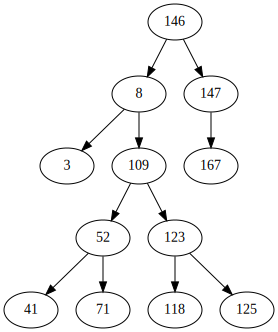

In [19]:
# Creata and visualise a binary search tree from scratch
rnd.seed(10)
unsorted_sequence = rnd.sample(range(200),12)
nodes = [DataRecord(key,key) for key in unsorted_sequence]
binary_search_tree = BinarySearchTree(nodes)
binary_search_tree.draw()

In [20]:
# create a sorted list from record values of the nodes in our binary search tree
print(binary_search_tree.inorder_traversal(binary_search_tree.root))

[3, 8, 41, 52, 71, 109, 118, 123, 125, 146, 147, 167]


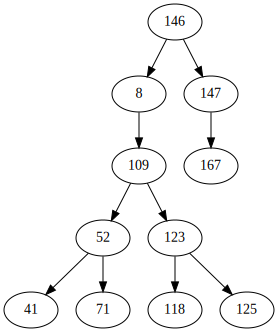

In [21]:
# Delete a node that has no child
binary_search_tree.delete(3)
binary_search_tree.draw()

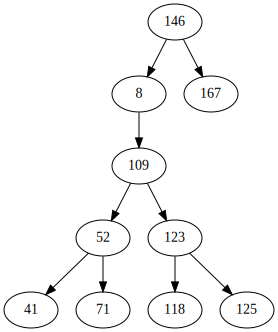

In [22]:
# Delete a node that has 1 child
binary_search_tree.delete(147)
binary_search_tree.draw()

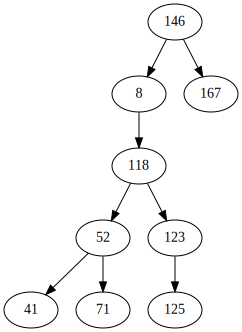

In [23]:
# Delete a node that has 2 children
binary_search_tree.delete(109)
binary_search_tree.draw()

the value to be deleted does not exist in the binary tree


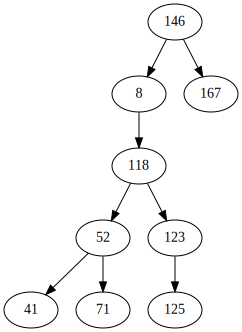

In [24]:
# Delete a node that does not exist in the tree
binary_search_tree.delete(1000)
binary_search_tree.draw()

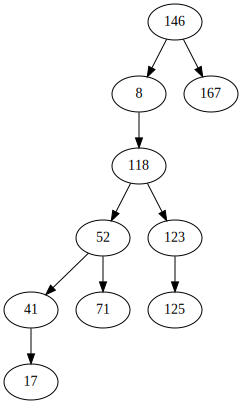

In [25]:
# Insert a new node
binary_search_tree.insert(DataRecord(17,17))
binary_search_tree.draw()